Used the shell layout to plot the graph but realised that it would not be feasible for any datasets of larger sizes as it is very crowded and tough to draw any conclusions from the plot.

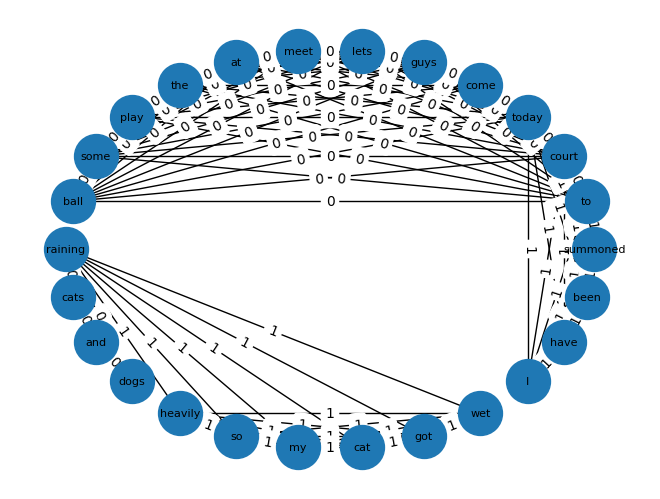

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Example n-grams with formality labels
ngrams = [
    (["raining", "cats", "and", "dogs"], "informal"),
    (["raining", "heavily","so","my","cat","got","wet"], "formal"),
    (["I", "have","been","summoned","to","court","today"], "formal"),
    (["come", "guys","lets","meet","at","the","court","today","to","play","some","ball"], "informal")
    # ... more n-grams ...
]

# Create a new graph
G = nx.Graph()

# Add nodes and edges based on n-grams
for words, formality in ngrams:
    for word in words:
        if not G.has_node(word):
            G.add_node(word, formality=formality)
            
    for i in range(len(words)):
        for j in range(i + 1, len(words)):
            # Assign numerical values for formality
            weight = 0 if formality == "informal" else 1
            G.add_edge(words[i], words[j], weight=weight)

# Plot the graph using shell layout
shell_layout = nx.shell_layout(G, nlist=[list(G.nodes())])
nx.draw(G, shell_layout, with_labels=True, node_size=1000, font_size=8)

# Add edge weights as labels
edge_labels = {(u, v): data["weight"] for u, v, data in G.edges(data=True)}
nx.draw_networkx_edge_labels(G, shell_layout, edge_labels=edge_labels)

# Show the plot
plt.show()